In [1]:
%load_ext autoreload
%autoreload 2

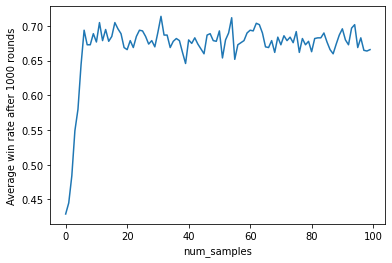

Average win rate of 1000 rounds is 0.6709


In [2]:
import gym
import matplotlib.pyplot as plt
from blackjack5decks_env import *
from q_learning import QLAgent
#modified 5 card play blackjack env
env = Blackjack5DecksEnv(natural=True)
# def __init__(self, env, learning_rate, gamma, train_amount, epsilon=1.)
agent = QLAgent(env=env, learning_rate=0.1, gamma=0.5, train_amount = 10000)

num_rounds = 1000
num_samples = 100
total_win_per_round = []
win_rate_per_round = []

observation = env.reset()
for i in range(num_samples):
    round = 1
    total_win = 0
    while round <= num_rounds:
        action = agent.choose_action(observation)
        next_observation, reward, is_done, _ = env.step(action)
        agent.learn(observation, action, reward, next_observation)
        observation = next_observation
        if is_done:
            if reward >= 0:
                total_win +=1
            observation = env.reset()
            round += 1
    total_win_per_round.append(total_win)
    win_rate_per_round.append(total_win/num_rounds)
    
plt.plot(win_rate_per_round)           
plt.xlabel('num_samples')
plt.ylabel('Average win rate after 1000 rounds')
plt.show()      
    
print ("Average win rate of {} rounds is {}".format(num_rounds, sum(total_win_per_round)/(num_rounds*num_samples)))

In [3]:
import pandas as pd
import numpy as np
kaggle_winner_data = pd.read_csv('kaggle_test_env.csv')
kaggle_winner_data

,Unnamed: 0,Unnamed: 0.1,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,0,Player1,7,10,0,0,0,17,10,...,0,0,18,nowin,-1,Beat,Dlwin,0,10,17
1,6,0,Player1,10,4,0,0,0,14,4,...,10,0,23,nowin,1,DlBust,Bust,20,0,14
2,12,0,Player1,10,2,0,0,0,12,4,...,10,0,26,nowin,1,DlBust,Bust,20,0,12
3,36,0,Player1,5,9,0,0,0,14,6,...,8,0,23,nowin,1,DlBust,Bust,20,0,14
4,42,0,Player1,6,7,0,0,0,13,5,...,0,0,17,nowin,-1,Beat,Dlwin,0,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112188,899940,0,Player1,10,10,0,0,0,20,11,...,0,0,21,nowin,-1,Beat,Dlwin,0,10,20
112189,899970,0,Player1,10,10,0,0,0,20,6,...,0,0,19,nowin,1,Plwin,Beat,20,0,20
112190,899982,0,Player1,10,11,0,0,0,21,6,...,0,0,26,Win,1,DlBust,Bust,25,0,21
112191,899988,0,Player1,10,9,0,0,0,19,10,...,0,0,21,nowin,-1,Beat,Dlwin,0,10,19


In [4]:
ply_test = kaggle_winner_data.loc[:,['card1','card2','card3','card4','card5']]

In [5]:
dl_test = kaggle_winner_data.loc[:,['dealcard1','dealcard2','dealcard3','dealcard4','dealcard5']]

In [6]:
# def __init__(self, ply_deck=False, dl_deck=False, game_round=False, has_df=False, natural=False)
test_env = Blackjack5DecksEnv(ply_deck=ply_test.to_numpy(), dl_deck=dl_test.to_numpy(), game_round=0, has_df=True)

num_rounds = 10000 # Payout calculated over num_rounds
total_win = 0

observation = test_env.reset()
# start testing on kaggle dataset based env
while round <= num_rounds:
    action = agent.choose_action(observation)
    next_observation, reward, is_done, _ = env.step(action)
    observation = next_observation
    if is_done:
        if reward >= 0:
            total_win +=1
        observation = env.reset()
        round += 1

print("Test Result(win rate):", total_win/num_rounds)

Test Result(win rate): 0.6158


In [9]:
#win(including push) rate of Player1
num_not_loss = (kaggle_winner_data['winloss'] >=0).sum()
total_games =  (kaggle_winner_data['winloss']).count()
player1_win_rate = num_not_loss/total_games
print("Player1 Result(win rate):", player1_win_rate.round(4))

Player1 Result(win rate): 0.5947
